In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
transform = transforms.Compose(
[transforms.ToTensor(),
transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
#데이터 불러오기, 학습여부 o
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
download=True, transform=transform)
#학습용 셋은 섞어서 뽑기
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
shuffle=True, num_workers=2)
#데이터 불러오기, 학습여부 x
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
download=True, transform=transform)
#테스트 셋은 굳이 섞을 필요가 없음
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
shuffle=False, num_workers=2)
#클래스들
classes = ('plane', 'car', 'bird', 'cat',
'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


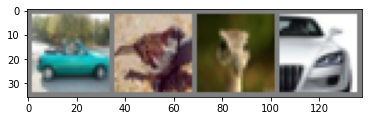

  car  bird  bird   car


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#이미지 확인하기
def imshow(img):
  img = img / 2 + 0.5 # 정규화 해제
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()
# 학습용 이미지 뽑기
dataiter = iter(trainloader)
images, labels = dataiter.next()
# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 이미지별 라벨 (클래스) 보여주기
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        #input = 3, output = 6, kernal = 5
        self.conv1 = nn.Conv2d(3, 6, 5)
        #kernal = 2, stride = 2, padding = 0 (default)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        #input feature, output feature
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    # 값 계산
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()

In [ ]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


In [ ]:
for epoch in range(2): #데이터셋 2번 받기
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    # 입력 받기 (데이터 [입력, 라벨(정답)]으로 이루어짐)
    inputs, labels = data
    #학습
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    # 결과 출력
    running_loss += loss.item()
    if i % 2000 == 1999: # print every 2000개마다
      print('[%d, %5d] loss: %.3f' %
      (epoch + 1, i + 1, running_loss / 2000))
      running_loss = 0.0
      
print('Finished Training')
#여기에 학습한 모델 저장
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[1,  2000] loss: 2.241
[1,  4000] loss: 1.957
[1,  6000] loss: 1.754
[1,  8000] loss: 1.629
[1, 10000] loss: 1.528
[1, 12000] loss: 1.501
[2,  2000] loss: 1.427
[2,  4000] loss: 1.409
[2,  6000] loss: 1.345
[2,  8000] loss: 1.311
[2, 10000] loss: 1.333
[2, 12000] loss: 1.277
Finished Training


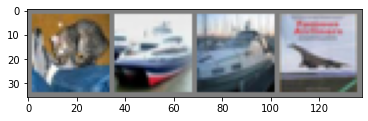

GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship  ship  ship


In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()
# 실험용 데이터와 결과 출력
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
# 학습한 모델로 예측값 뽑아보기
net = Net()
net.load_state_dict(torch.load(PATH))
outputs = net(images)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
for j in range(4)))
